In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Load dataset
df = pd.read_csv('final_dataset.csv', parse_dates=['date'])

In [3]:
# Split dataset based on provided criteria
train_df = df[df['date'].dt.year <= 2020]
test_df = df[df['date'].dt.year >= 2021]

In [4]:
print("Training set shape:", train_df.shape)

Training set shape: (42770, 114)


In [5]:
print("Test set shape:", test_df.shape)

Test set shape: (9464, 114)


In [6]:
# Separate features and target variable
X_train = train_df.drop(columns=['cases'])
y_train = train_df[['cases']]

X_test = test_df.drop(columns=['cases'])
y_test = test_df[['cases']]

In [7]:
# Check if any columns need scaling or encoding
# Ensure date-related features are not included in model training
if 'date' in X_train.columns:
    X_train = X_train.drop(columns=['date'])
    X_test = X_test.drop(columns=['date'])

In [8]:
# Build pipeline with scaler and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

In [9]:
# Train the model with progress visualization
print("Training SVR model...")
for _ in tqdm(range(1), desc="Training Progress"):
    pipeline.fit(X_train, y_train.values.ravel())

print("Model training complete.")

Training SVR model...


Training Progress: 100%|████████████████████████████████████████████████████████████████| 1/1 [03:38<00:00, 218.74s/it]

Model training complete.


In [10]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [11]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 172.97717562256045
R-squared (R2): 0.27967801300545814


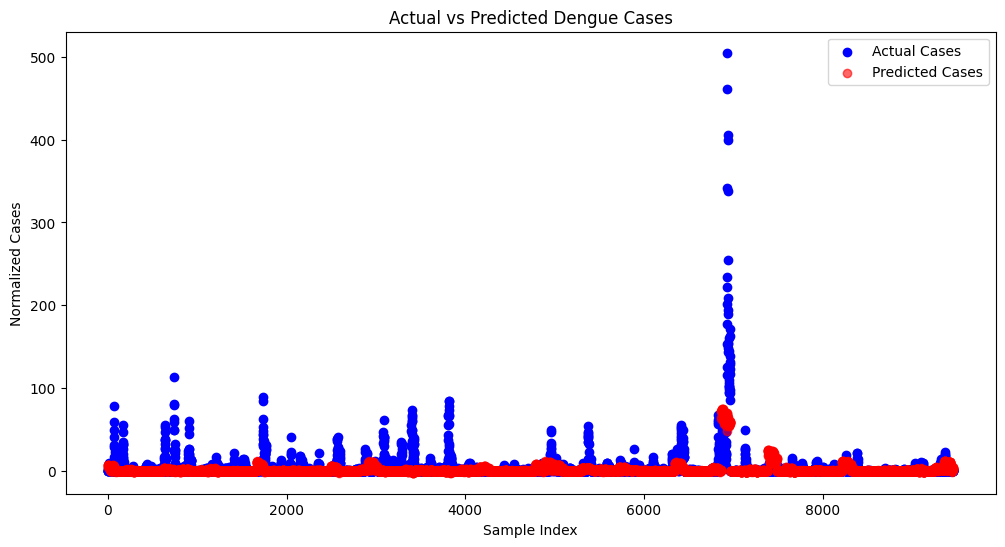

In [12]:
# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Cases')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Cases', alpha=0.6)
plt.title('Actual vs Predicted Dengue Cases')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Cases')
plt.legend()
plt.show()

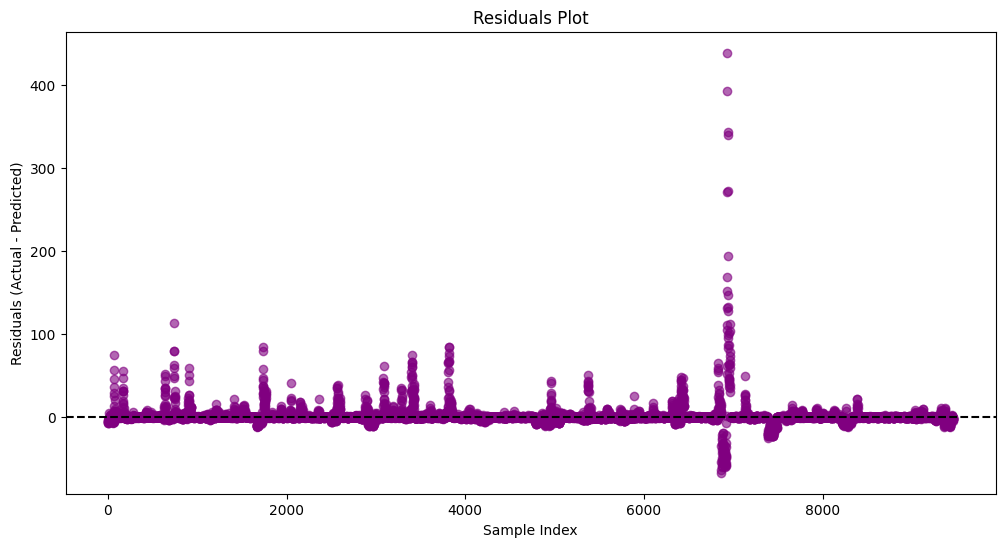

In [13]:
# Residual plot
residuals = y_test.values.ravel() - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5)
plt.title('Residuals Plot')
plt.xlabel('Sample Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()